## 1. Nettoyage et vérification

In [2]:
import pandas as pd

# Création des données simulées
data = {
    "jour": [
        "Lundi", "Lundi", "Lundi",
        "Mardi", "Mardi", "Mardi",
        "Mercredi", "Mercredi", "Mercredi",
        "Jeudi", "Jeudi", "Jeudi",
        "Vendredi", "Vendredi", "Vendredi",
        "Samedi", "Samedi", "Samedi",
        "Dimanche", "Dimanche", "Dimanche"
    ],
    "heure": [
        "07h", "12h", "18h",
        "07h", "12h", "18h",
        "07h", "12h", "18h",
        "07h", "12h", "18h",
        "07h", "12h", "18h",
        "07h", "12h", "18h",
        "07h", "12h", "18h"
    ],
    "nb_clients": [
        15, 25, 30,
        20, 22, 35,
        18, 20, 40,
        17, 21, 38,
        22, 24, 45,
        25, 30, 50,
        10, 12, 20
    ],
    "abonnement": [
        "Mensuel", "Mensuel", "Annuel",
        "Mensuel", "Annuel", "Annuel",
        "Mensuel", "Mensuel", "Annuel",
        "Mensuel", "Annuel", "Annuel",
        "Mensuel", "Mensuel", "Annuel",
        "Mensuel", "Annuel", "Annuel",
        "Mensuel", "Mensuel", "Annuel"
    ]
}

# Conversion en DataFrame
df = pd.DataFrame(data)

# Création de la colonne 'revenu' (nb_clients * prix_abonnement)
# Hypothèse : Mensuel = 10000 FCFA, Annuel = 100000 FCFA
df["revenu"] = df.apply(
    lambda row: row["nb_clients"] * 10000
if row["abonnement"] == "Mensuel" else
row["nb_clients"] * 100000,
    axis=1
)

# Vérifier le DataFrame
print(df.head(10))

# Sauvegarder en CSV
df.to_csv("../data/frequentation_salle.csv", index=False)
print("CSV généré avec succès!")

       jour heure  nb_clients abonnement   revenu
0     Lundi   07h          15    Mensuel   150000
1     Lundi   12h          25    Mensuel   250000
2     Lundi   18h          30     Annuel  3000000
3     Mardi   07h          20    Mensuel   200000
4     Mardi   12h          22     Annuel  2200000
5     Mardi   18h          35     Annuel  3500000
6  Mercredi   07h          18    Mensuel   180000
7  Mercredi   12h          20    Mensuel   200000
8  Mercredi   18h          40     Annuel  4000000
9     Jeudi   07h          17    Mensuel   170000
CSV généré avec succès!


In [4]:
import pandas as pd

# Charger le CSV
df = pd.read_csv("../data/frequentation_salle.csv")

# Aperçu rapide
print(df.head())
print(df.info())

# Vérifier les valeurs manquantes
print(df.isna().sum())

# Vérifier les types
print(df.dtypes)

    jour heure  nb_clients abonnement   revenu
0  Lundi   07h          15    Mensuel   150000
1  Lundi   12h          25    Mensuel   250000
2  Lundi   18h          30     Annuel  3000000
3  Mardi   07h          20    Mensuel   200000
4  Mardi   12h          22     Annuel  2200000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   jour        21 non-null     object
 1   heure       21 non-null     object
 2   nb_clients  21 non-null     int64 
 3   abonnement  21 non-null     object
 4   revenu      21 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 972.0+ bytes
None
jour          0
heure         0
nb_clients    0
abonnement    0
revenu        0
dtype: int64
jour          object
heure         object
nb_clients     int64
abonnement    object
revenu         int64
dtype: object


## 2. Analyse statistique simple

In [6]:
clients_par_jour = df.groupby("jour")["nb_clients"].sum()
clients_par_jour

jour
Dimanche     42
Jeudi        76
Lundi        70
Mardi        77
Mercredi     78
Samedi      105
Vendredi     91
Name: nb_clients, dtype: int64

In [7]:
revenu_par_abonnement = df.groupby("abonnement")["revenu"].sum()
revenu_par_abonnement

abonnement
Annuel     33100000
Mensuel     2080000
Name: revenu, dtype: int64

In [8]:
clients_par_heure = df.groupby("heure")["nb_clients"].sum()
clients_par_heure

heure
07h    127
12h    154
18h    258
Name: nb_clients, dtype: int64

## 3. Visualisations

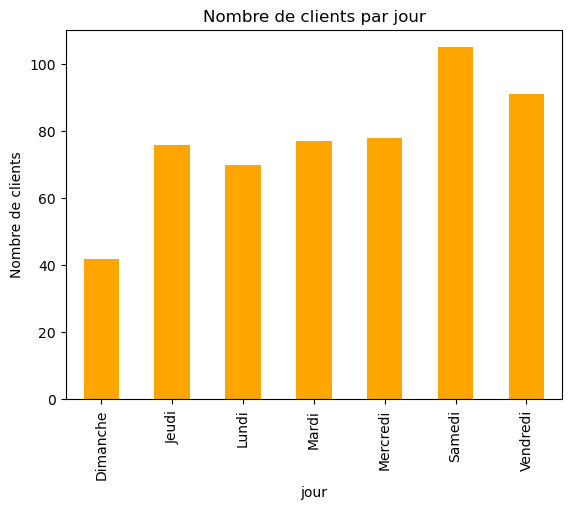

In [10]:
import matplotlib.pyplot as plt

clients_par_jour.plot(kind="bar", color="orange", title="Nombre de clients par jour")
plt.ylabel("Nombre de clients")
plt.savefig("../visuals/clients_par_jour.png", bbox_inches="tight")
plt.show()

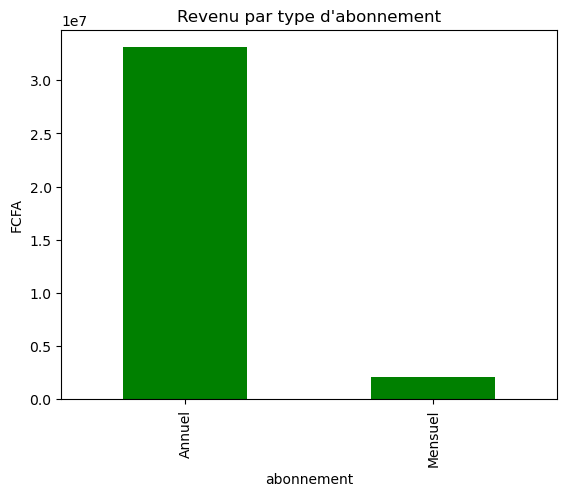

In [11]:
revenu_par_abonnement.plot(kind="bar", color="green", title="Revenu par type d'abonnement")
plt.ylabel("FCFA")
plt.savefig("../visuals/revenu_par_abonnement.png", bbox_inches="tight")
plt.show()

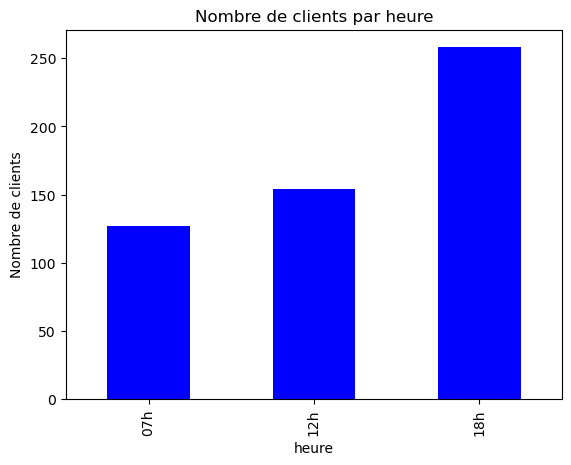

In [12]:
clients_par_heure.plot(kind="bar", color="blue", title="Nombre de clients par heure")
plt.ylabel("Nombre de clients")
plt.savefig("../visuals/clients_par_heure.png", bbox_inches="tight")
plt.show()

## 4. Conclusion et recommandations

In [10]:
jour_max_clients = clients_par_jour.idxmax()
jour_max_clients

'Samedi'

In [11]:
abonnement_max_revenu = revenu_par_abonnement.idxmax()
abonnement_max_revenu

'Annuel'

In [13]:
heure_max_clients = clients_par_heure.idxmax()
heure_max_clients

'18h'